# #1: Import all required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.legend_handler import HandlerLine2D

In [2]:
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,cross_val_score

In [3]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import auc

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [5]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier,ExtraTreesClassifier

In [6]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [7]:
from sklearn.model_selection import cross_validate

--------------------------------------------------------------------------------------------------------------------
# #2: Import dataset from URL

In [11]:
# Read data from the URL and store into a data frame. 
data=pd.read_csv("adult.data",
                 header=None, sep=',', na_values=' ?', keep_default_na=True, na_filter=True)


#### **PROBLEM
**The columns don't have headers in the data. Add column names 'age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship',
                         'race','sex','capital_gain','capital_loss','hours_per_week','native_country','income'

In [12]:
#Add headers
data=pd.DataFrame(data.values,columns=['age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship',
                         'race','sex','capital_gain','capital_loss','hours_per_week','native_country','income'])

In [13]:
#Check to see if column labeled properly
print('\nUpdated column labels for main dataset :')
data.head()


Updated column labels for main dataset :


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


--------------------------------------------------------------------------------------------------------------------
# #3: Find basic info about data
1. Quick info about data
2. Check number of rows
3. Check data types for each column
4. Check for missing values

In [14]:
# Quick info about data
print('\nDescription of main dataset :')
data.describe()


Description of main dataset :


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
count,32561,30725,32561,32561,32561,32561,30718,32561,32561,32561,32561,32561,32561,31978,32561
unique,73,8,21648,16,16,7,14,6,5,2,119,92,94,41,2
top,36,Private,203488,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,<=50K
freq,898,22696,13,10501,10501,14976,4140,13193,27816,21790,29849,31042,15217,29170,24720


In [15]:
#Number of rows, columns
print('\nTotal # of rows and columns :',data.shape)


Total # of rows and columns : (32561, 15)


In [16]:
#Data types for each column
print('\nData type information of main dataset :\n')
data.info()


Data type information of main dataset :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null object
workclass         30725 non-null object
fnlwgt            32561 non-null object
education         32561 non-null object
education_num     32561 non-null object
marital_status    32561 non-null object
occupation        30718 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital_gain      32561 non-null object
capital_loss      32561 non-null object
hours_per_week    32561 non-null object
native_country    31978 non-null object
income            32561 non-null object
dtypes: object(15)
memory usage: 3.7+ MB


In [17]:
#Find missing values count in rows for each column
print('\nMissing values for each column :\n')
data.isnull().sum()


Missing values for each column :



age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

--------------------------------------------------------------------------------------------------------------------
# #4. Data Prep
1. Missing data: Then drop rows with NaN values
2. Remove column 'education_num' because it's not useful for our purposes
3. Change data types for columns: 'age' 'fnlwgt' 'capital_gain' 'capital_loss' and 'hours_per_week' to int64
4. Change data type for column: 'income' to 'income' category

In [18]:
#Drop rows with na
data=data.dropna()

In [19]:
#Check to see for missing values again
print('\nUpdate -- Check for missing values after removing missing values :\n')
data.isnull().sum()


Update -- Check for missing values after removing missing values :



age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [20]:
#Remove 'education_num'
data=data.drop("education_num",axis=1)

#Check dataset for updated columns
print('\nUpdated dataset without education_num column :')
data.head()


Updated dataset without education_num column :


,age,workclass,fnlwgt,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [21]:
#Change dtype for 'age' to 'int64'
data['age']=data['age'].astype('int64')

#Change dtype for 'fnlwgt' to 'int64'
data['fnlwgt']=data['fnlwgt'].astype('int64')

#Change dtype for 'capital_gain' to 'int64'
data['capital_gain']=data['capital_gain'].astype('int64')

#Change dtype for 'capital_loss' to 'int64'
data['capital_loss']=data['capital_loss'].astype('int64')

#Change dtype for 'hours_per_week' to 'int64'
data['hours_per_week']=data['hours_per_week'].astype('int64')

In [22]:
#Change dtype for 'income' to 'category'
data['income']=data.income.astype("category").cat.codes

In [23]:
#Check to make sure changes to data types for each column
print('\nUpdated data type information of main dataset :\n')
data.info()


Updated data type information of main dataset :

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 14 columns):
age               30162 non-null int64
workclass         30162 non-null object
fnlwgt            30162 non-null int64
education         30162 non-null object
marital_status    30162 non-null object
occupation        30162 non-null object
relationship      30162 non-null object
race              30162 non-null object
sex               30162 non-null object
capital_gain      30162 non-null int64
capital_loss      30162 non-null int64
hours_per_week    30162 non-null int64
native_country    30162 non-null object
income            30162 non-null int8
dtypes: int64(5), int8(1), object(8)
memory usage: 3.3+ MB


In [24]:
# Last check for missing values
data.dropna(inplace=True)
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [25]:
#Check udpated number of rows and columns
print('\nUpdated number of rows and columns :', data.shape)


Updated number of rows and columns : (30162, 14)


-------------------------------------------------------------------------------------------------------------------
# #5: Encode data and split for training and testing

1. Create a new variable for all features data (without income column)
2. Create a new variable for only income data
3. Dummies encoding for all features
4. Split for training and testing

In [26]:
#Features variable = data without income column
data_feature=data.drop("income",axis=1)

In [27]:
#Income variable = only income data column
income=data.income

In [28]:
#Encode features to dummy variables
dataenc=pd.get_dummies(data_feature)

In [29]:
dataenc.dtypes

age                                int64
fnlwgt                             int64
capital_gain                       int64
capital_loss                       int64
hours_per_week                     int64
                                   ...  
native_country_ Thailand           uint8
native_country_ Trinadad&Tobago    uint8
native_country_ United-States      uint8
native_country_ Vietnam            uint8
native_country_ Yugoslavia         uint8
Length: 103, dtype: object

In [31]:
income.dtypes

dtype('int8')

In [37]:
income

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: income, Length: 30162, dtype: int8

In [32]:
print('\nNumber of rows and columns with encoded dummies : ', dataenc.shape)
print('\nUpdated dataset -- dataenc :')
dataenc.head()


Number of rows and columns with encoded dummies :  (30162, 103)

Updated dataset -- dataenc :


,age,fnlwgt,capital_gain,capital_loss,hours_per_week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,39,77516,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,0,0,13,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
#Split for train and testing
x_train,x_test,y_train,y_test=train_test_split(dataenc, income, test_size=0.3)

In [34]:
#Check row count for (X train + X test) & (Y train + Y test), both should equal 30162
print(
    "Count for x (train/test):\n\t",
    "(x_train) + (x_test) = 30162\n\t      ",
    len(x_train), "+", len(x_test),"=",(len(y_train)+len(x_test)), #X_train + X_test = check for 30162
    "\n\nCount for y (train/test):\n\t",
    "(y_train) + (y_test) = 30162\n\t      ",
    len(y_train), "+", len(y_test),"=",(len(y_train)+len(y_test)) #Y_train + Y_test = check for 30162
     )

Count for x (train/test):
	 (x_train) + (x_test) = 30162
	       21113 + 9049 = 30162 

Count for y (train/test):
	 (y_train) + (y_test) = 30162
	       21113 + 9049 = 30162


-------------------------------------------------------------------------------------------------------------------

-------------------------------------------------------------------------------------------------------------------
# #6: Voting Classifer

## Binary classifiers used:
1. Logistic Regression Classifier
2. Decision Tree Classifier
3. Support Vector Classifier

## Two versions of an ensemble classifiers: 

### Voting aggregates the predections of each classifiers ad predicts the class that gets the most votes. 
### #6.1. Soft voting
Here the predection is made by averaging the probabilities calculated by each classifier in the ensemble. It can only be applied to the classifers which use probability for outcome. 

### #6.2. Hard voting
A model is selected from the ensemble to make the final predection by majority vote for accuracy. Suppose we have three classifiers that give predection (with two classes A and B) as (A ,A, B) in this case our ensemble classifier will predict class A as majority of the classifiers have predicted the same. 

### #6.3 Area under the curve as performance metric
1. Compare hard and soft voting classifer

### #6.4. Comparison results
1. Which one is better and why

-------------------------------------------------------------------------------------------------------------------

# #6.1.  Soft Voting  (setup and fit with classifiers, prediction-probability)

In [35]:
#Logistic Regression Classifier
LR=LogisticRegression(random_state=13)

#Decision Tree Classifier
DT=DecisionTreeClassifier(random_state=13)

#Support Vector Classifier
from sklearn.svm import SVC #To avoid errors
SVC=SVC(random_state=13, probability=True)

In [36]:
#Voting classifier using soft voting
#Run LR, DT, SVC binary classifers
voting_clf_soft=VotingClassifier(estimators=[('lr',LR),('dt',DT),('svc',SVC)],voting='soft',n_jobs=-1)

#Fit for x/y train
voting_clf_soft.fit(x_train,y_train)

KeyboardInterrupt: 

In [ ]:
#Probability/predictions for soft voting for x_test
probs_soft=voting_clf_soft.predict_proba(x_test)

In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
score=cross_validate(voting_clf_soft,x_train,y_train)

-------------------------------------------------------------------------------------------------------------------

# #6.2.  Hard Voting  (setup and fit with classifiers, prediction-probability)

In [ ]:
#Logistic Regression Classifier
LR=LogisticRegression(random_state=13)

#Decision Tree Classifier
DT=DecisionTreeClassifier(random_state=13)

#Support Vector Classifier  -- No need to define probability for hard voting
from sklearn.svm import SVC #To avoid errors
SVC=SVC(random_state=13)

In [ ]:
#Voting classifier using hard voting
#Run LR, DT, SVC binary classifers
voting_clf_hard=VotingClassifier(estimators=[('lr',LR),('dt',DT),('svc',SVC)],voting='hard',n_jobs=-1)

#Fit for x/y train
voting_clf_hard.fit(x_train,y_train)

In [ ]:
#Probability/predictions for hard voting for x_test
probs_hard=voting_clf_hard.predict(x_test)

-------------------------------------------------------------------------------------------------------------------

# #6.3.  Area under the curve performance metric

In [ ]:
#Probability predictions for hard/soft voting classifiers
pred_soft=probs_soft[...,1]
pred_hard=probs_hard

#Area under the curve scores for soft voting classifier
auc_soft=roc_auc_score(y_test,pred_soft)
print("AUC of Soft Voting: %.3f" % auc_soft)

#Area under the curve scores for hard voting classifier
auc_hard=roc_auc_score(y_test,pred_hard)
print("AUC of Hard Voting: %.3f" % auc_hard)

#Visualize the scores with ROC curve for soft and hard voting
fpr_s, tpr_s, thresholds_s = roc_curve(y_test, pred_soft)
fpr_h, tpr_h, thresholds_h = roc_curve(y_test, pred_hard)
soft_voting,=plt.plot(fpr_s, tpr_s,marker='.',label='soft')
hard_voting,=plt.plot(fpr_h, tpr_h,marker='.',label='hard')
plt.legend([soft_voting, hard_voting],['soft_voting','hard_voting'])

#Plot ROC curve for soft and hard voting
plt.show()

-------------------------------------------------------------------------------------------------------------------

# #6.4.  Results:
**Which one is better? Why?**

Soft voting out-performs hard voting, because it adds more weight to the highly confident votes

-------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------


#  #7. Bagging Classifier with Extreme Trees Classifier
1. With 100 classifiers
2. Each trained on 500 instances

### #7.1 Trained on all features (103)

### #7.2 Trained with max_features set to 5

### #7.3 Area under the curve as performance metric
1. Compare hard and soft voting classifer

### #7.4. Comparison results
1. Which one is better and why

-------------------------------------------------------------------------------------------------------------------

# #7.1.  Bagging Classifier Score -- Trained on all features (max_features = 103)

In [34]:
#Bagging classifier for Extreme Trees Classifier with 100 classifiers, 500 instances, all features
bag_clf_all=BaggingClassifier(ExtraTreesClassifier(),
                          n_estimators=100, #100 classifiers
                          max_samples=500, #500 instances
                          bootstrap=True,
                          n_jobs=-1,
                          max_features=103, #all features (103)
                          random_state=20)

#Fit to train bag_clf_all
bag_clf_all.fit(x_train,y_train)

#Predict with test for y_pred_all
y_pred_all=bag_clf_all.predict(x_test)

#Print bagging classifier accuracy score
print('\nBagging Classifier with Extreme Trees Classifier\n\nAccurarcy score with ALL features (max_features=103) : \n',
      bag_clf_all.__class__.__name__,accuracy_score(y_test,y_pred_all))


Bagging Classifier with Extreme Trees Classifier

Accurarcy score with ALL features (max_features=103) : 
 BaggingClassifier 0.8428555641507349


-------------------------------------------------------------------------------------------------------------------

# #7.2.  Bagging Classifier Score -- Trained on max_features = 5

In [35]:
#Bagging classifier for Extreme Trees Classifier with 100 classifiers, 500 instances, 5 features
bag_clf_five=BaggingClassifier(ExtraTreesClassifier(),
                               n_estimators=100, #100 classifiers
                               max_samples=500, #500 instances
                               bootstrap=True,
                               n_jobs=-1,
                               max_features=5, #5 features
                               random_state=20)
#Fit to train bag_clf_five
bag_clf_five.fit(x_train,y_train)

#Predict with test for y_pred_five
y_pred_five=bag_clf_five.predict(x_test)

#Print bagging classifier accuracy score
print('\nBagging Classifier with Extreme Trees Classifier\n\nAccurarcy score with 5 features (max_features=5) : \n',
      bag_clf_five.__class__.__name__,accuracy_score(y_test,y_pred_five))


Bagging Classifier with Extreme Trees Classifier

Accurarcy score with 5 features (max_features=5) : 
 BaggingClassifier 0.7553320808929164


-------------------------------------------------------------------------------------------------------------------

# #7.3.  Area under the curve performance metric

AUC with all features: 0.755
AUC with only five features: 0.500


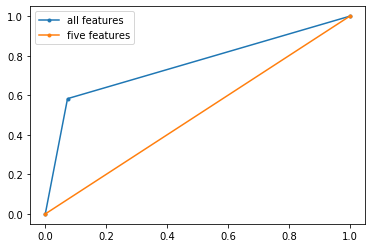

In [36]:
#Probabilty for all features
probs_all=y_pred_all
#Area under the curve ROC score for all features
auc_all=roc_auc_score(y_test,probs_all)
#Visualize the scores with ROC curve
fpr_all, tpr_all, thresholds_all = roc_curve(y_test, probs_all)


#Probabilty for 5 features
probs_five=y_pred_five
#Area under the curve ROC score for 5 features
auc_five=roc_auc_score(y_test,probs_five)
#Visualize the scores with ROC curve
fpr_five, tpr_five, thresholds_five = roc_curve(y_test, probs_five)

#Plot ROC curve for all features
all,=plt.plot(fpr_all, tpr_all,marker='.',label='all_feature')
#Plot ROC curve for 5 features
five,=plt.plot(fpr_five, tpr_five,marker='.',label='five_feature')

#Print AUC score for all features
print("AUC with all features: %.3f" % auc_all)
#Print AUC score for 5 features
print("AUC with only five features: %.3f" % auc_five)

#Plot Legends
plt.legend([all,five],['all features','five features'])

#Plot
plt.show()

-------------------------------------------------------------------------------------------------------------------

# #7.4.  Results
**Which one is better? Why?**

Bagging with all features performs better than with only five features as it learns more about the data with more features.


-------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------
# #8. Gradient boosting classifier
Gradient boosting is a machine learning technique for regression and classification problems, which produces a predection model in the form of an ensemble of weak prediction models, typically decision trees.

**learning_rate**
1. This determines the impact of each tree on the final outcome.
2. Lower values are generally preferred as they make the model robust to the specific characteristics of tree and thus allowing it to generalize well.
3. Lower values would require higher number of trees to model all the relations and will be computationally expensive.

**n_estimators**
1. The number of sequential trees to be modeled
2. Though it is fairly robust at higher number of trees but it can still overfit at a point. Hence, this should be tuned using CV for a particular learning rate(cv).

### #8.1 Train with various hyperparameters for learning_rates and n_estimators to find best hyperparameters and estimators for gradient boosting using Grid Search CV
1. Set hyperparameters
2. Tune using Grid Search CV
3. Fit tuned to train
4. Show best hyperparameters using Grid Search
5. Show best estimators using Grid Search

### #8.2 Boost with the different hyperparameters
1. Use varied learning rates and n_estimators
2. Fit to train
3. Predict with test
4. Find ROC AUC score
5. Visualize ROC curve

###   #8.3 Results
1. Plot to see best AUC ROC scores

-------------------------------------------------------------------------------------------------------------------

# #8.1.  Train with following hyperparameters values:
1. n_estimators: 10,50,100,120,130,150,180,200
2. learning_rate: 0.10,0.15,0.25,0.3,0.35


## Tune and find best hyperparameters for Gradient Boosting Classifier with Grid Search CV

In [62]:
#Set hyperparameters for n_estimators and learning_rates
hyper_param=[{'n_estimators':[10,50,100,120,130,150,180,200],'learning_rate':[0.10,0.15,0.25,0.3,0.35]},]

#Using Grid search CV with above n_estimators and learning rates
tuning=GridSearchCV(estimator=GradientBoostingClassifier(random_state=20),param_grid=hyper_param,
                    scoring='accuracy',n_jobs=-1,cv=20)

#Fit to tune best hyperparameters
tuning.fit(x_train,y_train)

GridSearchCV(cv=20, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
                                                  presort

In [114]:
#Find best hyperparameters
print('\nBest hyperparameters found using Grid Search CV :\n')
tuning.best_params_


Best hyperparameters found using Grid Search CV :



{'learning_rate': 0.25, 'n_estimators': 150}

In [115]:
#Find best estimators
print('\nBest estimators found using Grid Search CV : \n')
tuning.best_estimator_


Best estimators found using Grid Search CV : 



GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.25, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=150,
                           n_iter_no_change=None, presort='auto',
                           random_state=20, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

-------------------------------------------------------------------------------------------------------------------

# #8.2  Gradient Boosting #1
## learning_rate  = 0.1, n_estimators=10

In [108]:
#Boost with Gradient Boosting Classifier with learning rate = 0.1, n_estimators=10
gcb_1=GradientBoostingClassifier(learning_rate=0.1,max_depth=3,random_state=20,n_estimators=10)

#Fit to  train
gcb_1.fit(x_train,y_train)

#Predict with test
y_pred_1=gcb_1.predict(x_test)

#ROC AUC score
roc_auc_1=roc_auc_score(y_test,y_pred_1)

#Visualize the scores for ROC curve
fpr_1,tpr_1,threshold_1=roc_curve(y_test,gcb_1.predict_proba(x_test)[...,1])


#Print AUC score
print('learning_rate=0.1\n_estimators=10\n\nAUC score:\n',roc_auc_1)

learning_rate=0.1
_estimators=10

AUC score:
 0.6197979011002009


# #8.2  Gradient Boosting #2
## learning_rate  = 0.2, n_estimators=130

In [109]:
#Boost with Gradient Boosting Classifier with learning rate = 0.2, n_estimators=130
gcb_2=GradientBoostingClassifier(learning_rate=0.2,max_depth=3,random_state=20,n_estimators=130)

#Fit to  train
gcb_2.fit(x_train,y_train)

#Predict with test
y_pred_2=gcb_2.predict(x_test)

#ROC AUC score
roc_auc_2=roc_auc_score(y_test,y_pred_2)

#Visualize the scores for ROC curve
fpr_2,tpr_2,threshold_2=roc_curve(y_test,gcb_2.predict_proba(x_test)[...,1])

#Print AUC score
print('learning_rate=0.25\n_estimators=130\n\nAUC score:\n',roc_auc_2)

learning_rate=0.25
_estimators=130

AUC score:
 0.7958880740965419


# #8.2  Gradient Boosting #3
## learning_rate  = 0.25, n_estimators=150
**This was found to be the best combination using Grid Search**

In [110]:
#Boost with Gradient Boosting Classifier with learning rate = 0.25, n_estimators=150
gcb_3=GradientBoostingClassifier(learning_rate=0.25,max_depth=3,random_state=20,n_estimators=150)

#Fit to  train
gcb_3.fit(x_train,y_train)

#Predict with test
y_pred_3=gcb_modified_1.predict(x_test)

#ROC AUC score
roc_auc_3=roc_auc_score(y_test,y_pred_3)

#Visualize the scores for ROC curve
fpr_3,tpr_3,threshold_3=roc_curve(y_test,gcb_3.predict_proba(x_test)[...,1])

#Print AUC score
print('learning_rate=0.25\n_estimators=150\n\nAUC score:\n',roc_auc_3)

learning_rate=0.25
_estimators=150

AUC score:
 0.7994252839382819


# #8.2  Gradient Boosting #4
## learning_rate  = 0.3, n_estimators=180

In [111]:
#Boost with Gradient Boosting Classifier with learning rate = 0.3, n_estimators=180
gcb_4=GradientBoostingClassifier(learning_rate=0.30,max_depth=3,random_state=20,n_estimators=180)

#Fit to  train
gcb_4.fit(x_train,y_train)

#Predict with test
y_pred_4=gcb_modified_1.predict(x_test)

#ROC AUC score
roc_auc_4=roc_auc_score(y_test,y_pred_4)

#Visualize the scores for ROC curve
fpr_4,tpr_4,threshold_4=roc_curve(y_test,gcb_4.predict_proba(x_test)[...,1])

#Print AUC score
print('learning_rate=0.3\n_estimators=200\n\nAUC score:\n',roc_auc_4)

learning_rate=0.3
_estimators=200

AUC score:
 0.7994252839382819


# #8.2  Gradient Boosting #5
## learning_rate  = 0.35, n_estimators=200

In [112]:
#Boost with Gradient Boosting Classifier with learning rate = 0.35, n_estimators=200
gcb_5=GradientBoostingClassifier(learning_rate=0.35,max_depth=3,random_state=20,n_estimators=200)

#Fit to  train
gcb_5.fit(x_train,y_train)

#Predict with test
y_pred_5=gcb_modified_1.predict(x_test)

#ROC AUC score
roc_auc_5=roc_auc_score(y_test,y_pred_5)

#Visualize the scores for ROC curve
fpr_5,tpr_5,threshold_5=roc_curve(y_test,gcb_5.predict_proba(x_test)[...,1])

#Print AUC score
print('learning_rate=5.0\n_estimators=200\n\nAUC score:\n',roc_auc_5)

learning_rate=5.0
_estimators=200

AUC score:
 0.7994252839382819


-------------------------------------------------------------------------------------------------------------------

# #8.4 Results

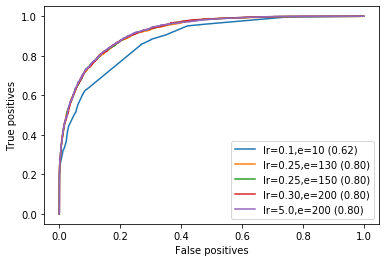

In [113]:
#Plot Gradient Boosting scores for learning rate = 0.1, n_estimators=10
plot_one,=plt.plot(fpr_1,tpr_1,label="learning_rate=0.1,estimator=10 (%0.2f)"%roc_auc_1)

#Plot Gradient Boosting scores for learning rate = 0.2, n_estimators=130
plot_two,=plt.plot(fpr_2,tpr_2,label="learning_rate=0.25,estimator=130 (%0.2f)"%roc_auc_2)

#Plot Gradient Boosting scores for learning rate = 0.25, n_estimators=150
plot_three,=plt.plot(fpr_3,tpr_3,label="learning_rate=0.25,estimator=150 (%0.2f)"%roc_auc_3)

#Plot Gradient Boosting scores for learning rate = 0.3, n_estimators=180
plot_four,=plt.plot(fpr_4,tpr_4,label="learning_rate=0.30,estimator=200 (%0.2f)"%roc_auc_4)

#Plot Gradient Boosting scores for learning rate = 0.35, n_estimators=200
plot_five,=plt.plot(fpr_5,tpr_5,label="learning_rate=5.0,estimator=200 (%0.2f)"%roc_auc_5)

#Legend for plot
plt.legend([plot_one,plot_two,plot_three,plot_four,plot_five],
           [("lr=0.1,e=10 (%0.2f)" %roc_auc_1),#learning rate = 0.1, n_estimators=10
            ("lr=0.25,e=130 (%0.2f)" %roc_auc_2),#learning rate = 0.2, n_estimators=130
            ("lr=0.25,e=150 (%0.2f)" %roc_auc_3),#learning rate = 0.25, n_estimators=150
            ("lr=0.30,e=200 (%0.2f)" %roc_auc_4),#learning rate = 0.3, n_estimators=180
            ("lr=5.0,e=200 (%0.2f)" %roc_auc_5)#learning rate = 0.35, n_estimators=200
           ])
plt.ylabel('True positives')
plt.xlabel('False positives')

#Plot
plt.show()